# **Diabetes Prediction**

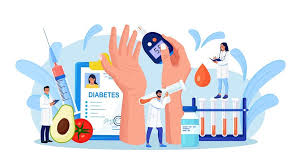

### Step 1: Loading the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from warnings import filterwarnings

c:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Step 2: Data Loading & Pre-processing


In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Info about the data
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Statistical summary of the data
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
# Check for missing values 
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Check for duplicate rows
diabetes_data.duplicated().sum()

0

In [7]:
# Check for unique values in each column
diabetes_data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
# Check for the distribution of the target variable
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

1 --> Diabetic

0 --> Non-diabetic

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


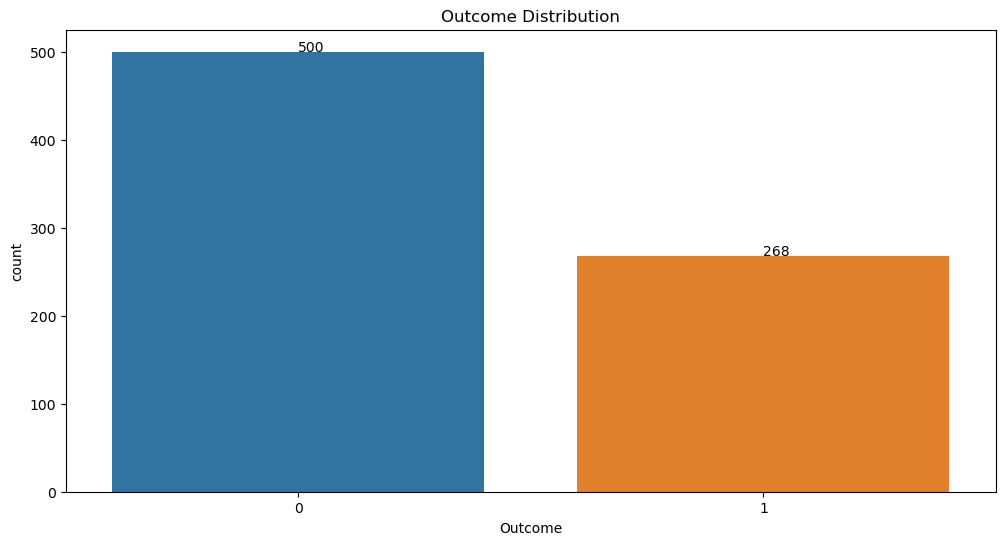

In [9]:
# Visualize the distribution of the target variable
plt.figure(figsize=(12, 6))
plt.title('Outcome Distribution')
sns.countplot(diabetes_data['Outcome'])
for i in range(2):
    plt.text(i, diabetes_data['Outcome'].value_counts()[i], diabetes_data['Outcome'].value_counts()[i])

### Step 3: Standardization

In [10]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


### Step 4: Splitting into Training set & Testing Set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    stratify = y,
                                                    random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8)

(154, 8)

(614,)

(154,)

### Step 5: Model Build --> Support Vector Machine

In [13]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Instatiating the model
model = svm.SVC()

# Fitting/Training the model
model.fit(X_train, y_train)

SVC()

In [14]:
# Training Model Prediction & Accuracy
training_data_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train, training_data_pred)
print('Training Accuracy:', training_accuracy)

# Testing Model Prediction & Accuracy
testing_data_pred = model.predict(X_test)
testing_accuracy = accuracy_score(y_test, testing_data_pred)
print('Testing Accuracy:', testing_accuracy)

Training Accuracy: 0.8355048859934854
Testing Accuracy: 0.7467532467532467


### Step 6: Building the Predictive System

In [15]:
input_data = (6,148,72,35,0,33.6,0.627,50)

# Reshaping the input data
input_data_reshaped = np.array(input_data).reshape(1,-1)

# Converting the reshaped data to as_numpy_array
input_data_as_numpy_array = np.asarray(input_data_reshaped)

# standardizing the input_data_as_numpy_array
model_scale = StandardScaler()
scaled_input_data = model_scale.fit_transform(input_data_as_numpy_array)

# Predicting the new data
predicted_value = model.predict(scaled_input_data)
print(predicted_value)

if predicted_value[0] == 1:
    print('The person is Diabetic')
else:
    print('The person is Non-Diabetic')

[0]
The person is Non-Diabetic


### Saving the Trained Model

In [16]:
import pickle

In [17]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [18]:
# Loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))
loaded_model

SVC()

In [19]:
input_data = (6,148,72,35,0,33.6,0.627,50)

# Reshaping the input data
input_data_reshaped = np.array(input_data).reshape(1,-1)

# Converting the reshaped data to as_numpy_array
input_data_as_numpy_array = np.asarray(input_data_reshaped)

# standardizing the input_data_as_numpy_array
model_scale = StandardScaler()
scaled_input_data = model_scale.fit_transform(input_data_as_numpy_array)

# Predicting the new data
predicted_value = loaded_model.predict(scaled_input_data)
print(predicted_value)

if predicted_value[0] == 1:
    print('The person is Diabetic')
else:
    print('The person is Non-Diabetic')

[0]
The person is Non-Diabetic


In [ ]:
joblib.dump(model, filename = "model.pkl")
print("Model dumped!")